In [29]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

import matplotlib.pyplot as plt

In [2]:
wine_data = pd.read_csv("wine.csv")

In [3]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [4]:
wine_data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,bad
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,bad
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,good
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,good
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,bad


In [5]:
wine_data["quality"] = wine_data["quality"].replace("bad",0)
wine_data["quality"] = wine_data["quality"].replace("good",1)

In [6]:
wine_data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


## Split Data into Training and Validation 

In [7]:
x_train, x_test, y_train, y_test = train_test_split(
    wine_data.drop("quality", axis=1),
    wine_data["quality"],
    test_size=.2,
    random_state=42
)

## Train Model

In [8]:
randForest = RandomForestClassifier(random_state=0)

In [9]:
randForest.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [10]:
predictions = randForest.predict(x_test)

In [11]:
prediction_probabilities = randForest.predict_proba(x_test)

## Evaluate Model

In [12]:
actual_values = np.array(y_test)

In [13]:
predicted_values = np.array(predictions)

In [14]:
predicted_values_probabilities = prediction_probabilities[::,1] 

## Confusion Matrix

In [15]:
cm = confusion_matrix(actual_values, predicted_values)

In [16]:
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

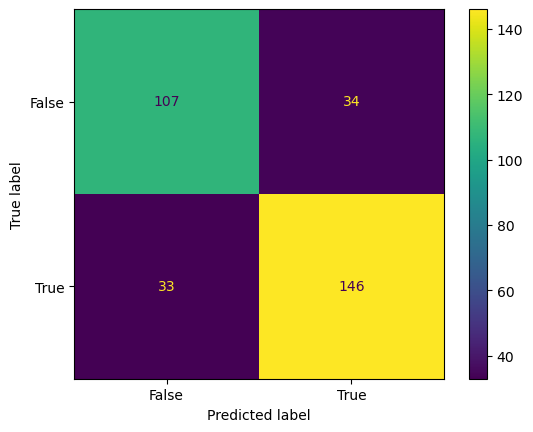

In [17]:
confusion_matrix_display.plot()
plt.show()

## Accuracy

In [18]:
accuracy_score(actual_values, predicted_values)

0.790625

## Precision

In [19]:
precision_score(actual_values, predicted_values)

0.8111111111111111

## Recall

In [20]:
recall_score(actual_values, predicted_values)

0.8156424581005587

## F1 Score

In [21]:
# f1_score(actual_values, predicted_values, pos_label='good')
f1_score(actual_values, predicted_values)

0.8133704735376045

## Area Under the Receiver Operator Characteristic (AUROC) Curve

In [31]:
FPR, TPR, _ = roc_curve(actual_values, predicted_values_probabilities)

In [34]:
AUC = roc_auc_score(actual_values, predicted_values_probabilities)

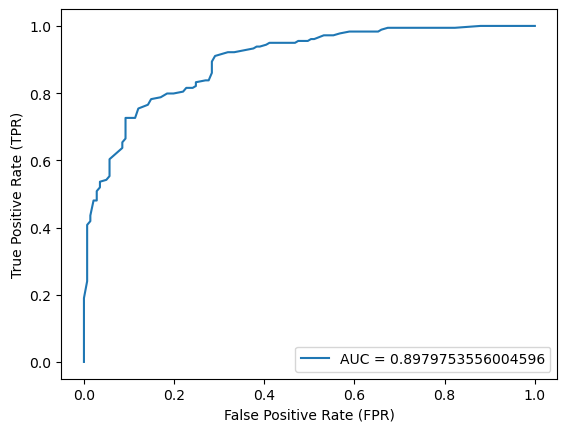

In [38]:
plt.plot(FPR, TPR, label="AUC = "+str(AUC))
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc=4)